## CIFAR-100 - Representations from ResNet-18

In [1]:
from KNNClassifier import KNNClassifier
from GradKNNClassifier import GradKNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [2]:
device = DatasetRun.get_device()

Device used: cuda


### Sample run

Using FeNeC:

In [3]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=2, gamma_1=0.9, gamma_2=0.9, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and FeNeC
kmeans = KMeans(n_clusters=47, metric=metric_kmeans)
clf = KNNClassifier(n_neighbors=2, 
                    metric=metric, 
                    data_normalization=False, 
                    tukey_lambda=0.4, 
                    kmeans=kmeans, 
                    device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=1)

|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          50 | 84.00%      | 83.76%   |     0.84 |       0.84 | 100.00%            |
task 0: (time: 11.5100s)
FeCAM accuracy: 83.5600; My accuracy: 83.7600
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          50 | 84.52%      | 78.70%   |     0.81 |       0.79 | 77.55%             |
|      1 |          10 | 48.64%      | 62.50%   |     0.54 |       0.62 | 22.45%             |
task 1: (time: 4.2886s)
FeCAM accuracy: 76.5167; My accuracy: 76.0000
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|   

Using FeLoC:

In [4]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=2, gamma_1=1.1, gamma_2=1.9, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and FeLoC
kmeans = KMeans(n_clusters=45, metric=metric_kmeans)
clf = GradKNNClassifier(metric=metric,
                        kmeans=kmeans,
                        data_normalization=False,
                        device=device,
                        tukey_lambda=0.4,
                        batch_size=8,
                        optimizer="SGD", 
                        n_points=2, 
                        mode=0,
                        num_epochs=200, 
                        lr=0.003,
                        early_stop_patience=10,
                        reg_type=None, 
                        reg_lambda=None, 
                        normalization_type=None, 
                        tanh_x=None, 
                        centroids_new_old_ratio=None,
                        train_only_on_first_task=True, 
                        dataloader_batch_size=64)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=1)

Dataloader created
Validation Accuracy after Epoch [1/200]: 100.00%, Loss = 2.0065,
Validation Accuracy after Epoch [11/200]: 100.00%, Loss = 0.2018,
Validation Accuracy after Epoch [21/200]: 100.00%, Loss = 0.0983,
Validation Accuracy after Epoch [31/200]: 100.00%, Loss = 0.0654,
Validation Accuracy after Epoch [41/200]: 100.00%, Loss = 0.0494,
Validation Accuracy after Epoch [51/200]: 100.00%, Loss = 0.0399,
Validation Accuracy after Epoch [61/200]: 100.00%, Loss = 0.0336,
Validation Accuracy after Epoch [71/200]: 100.00%, Loss = 0.0291,
Validation Accuracy after Epoch [81/200]: 100.00%, Loss = 0.0257,
Validation Accuracy after Epoch [91/200]: 100.00%, Loss = 0.0231,
Validation Accuracy after Epoch [101/200]: 100.00%, Loss = 0.0210,
Validation Accuracy after Epoch [111/200]: 100.00%, Loss = 0.0192,
Validation Accuracy after Epoch [121/200]: 100.00%, Loss = 0.0178,
Validation Accuracy after Epoch [131/200]: 100.00%, Loss = 0.0166,
Validation Accuracy after Epoch [141/200]: 100.00%, Lo

## Grid search results - plot hyperparameters

In [5]:
study_name = "GridSearch_FeNeC_CIFAR_ResNet"

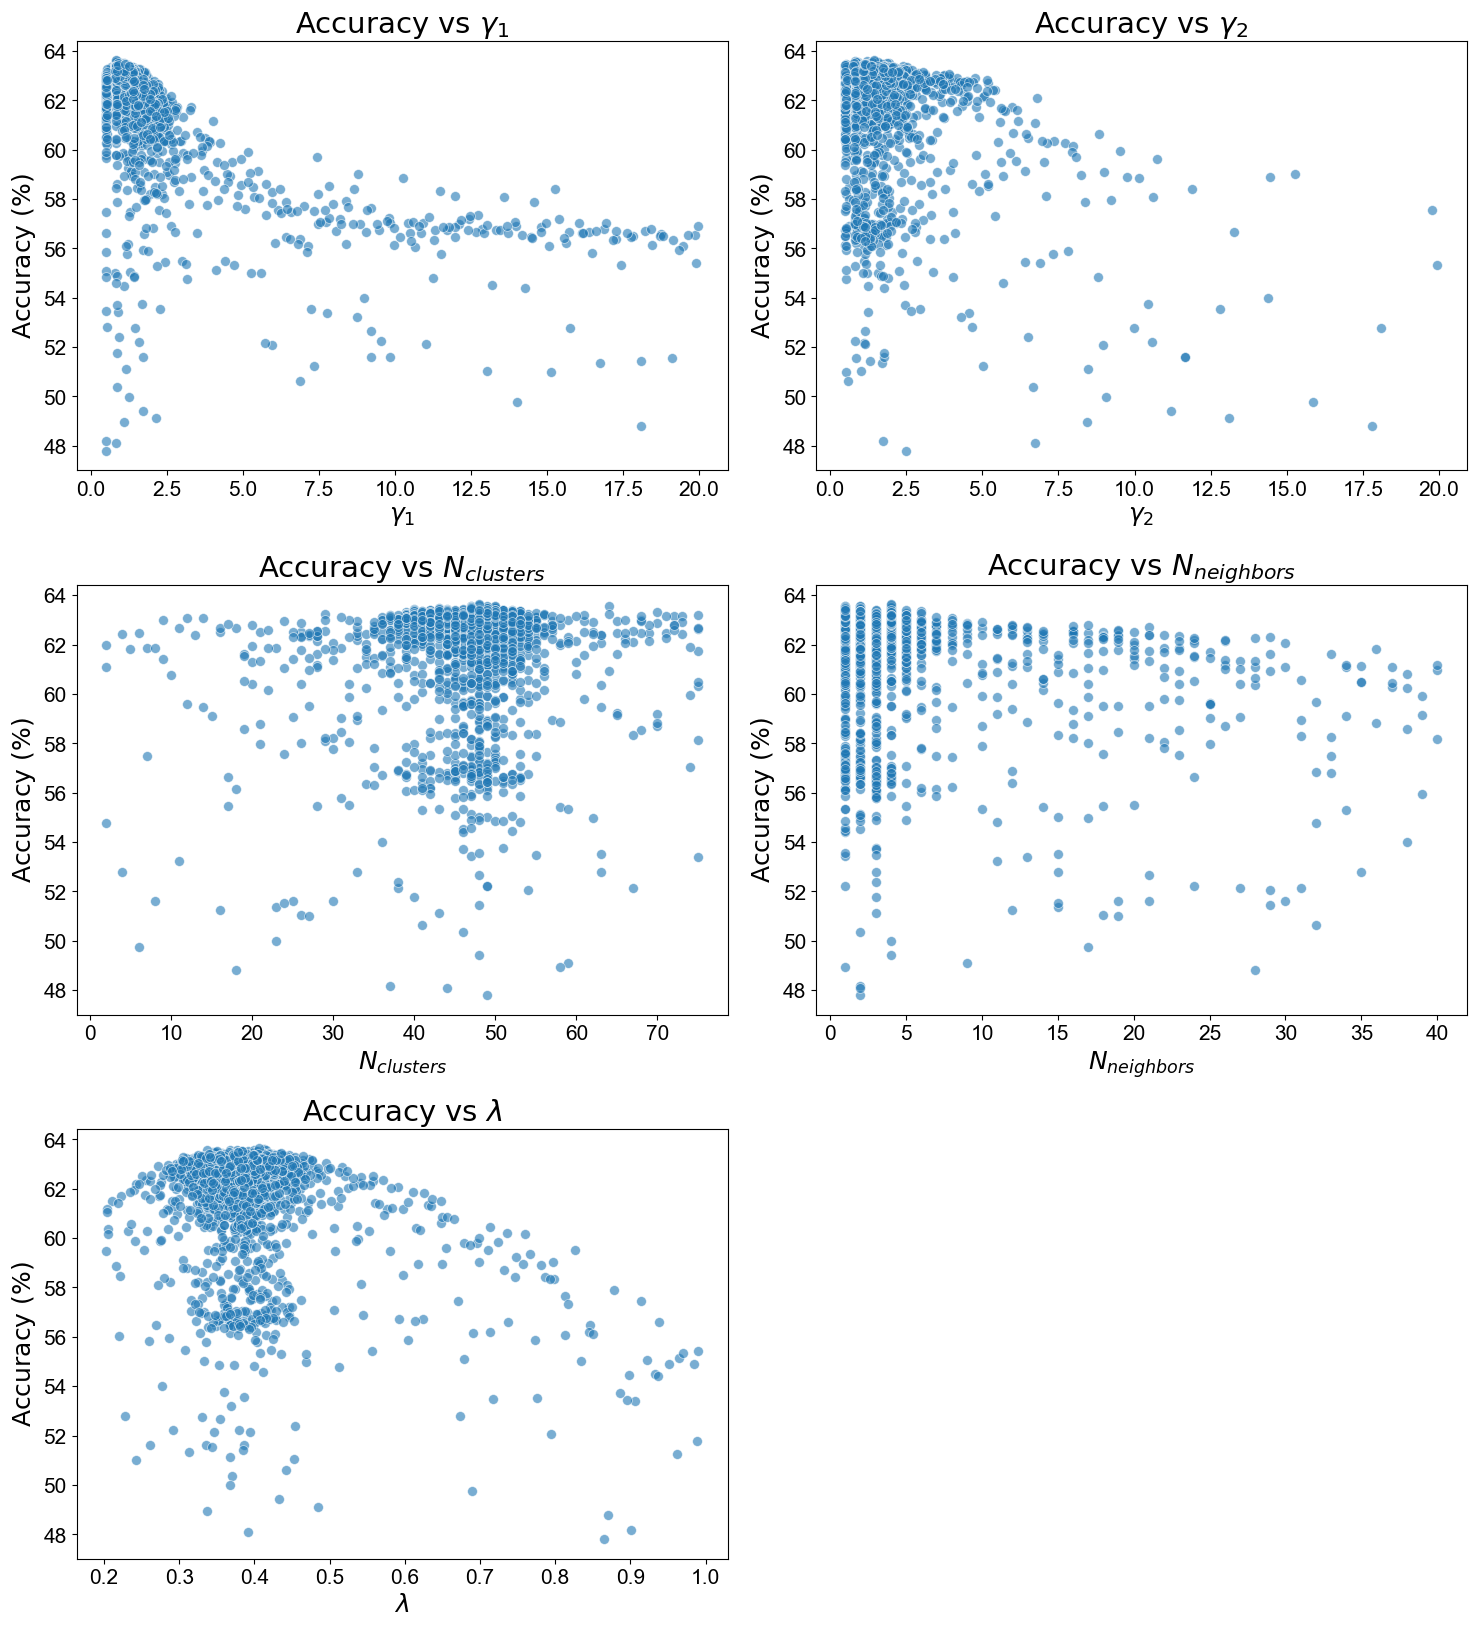

In [6]:
DatasetRun.plot_params_accuracy(study_name=study_name, path='../results/final/', ylim=True, only_later=None, columns=2)

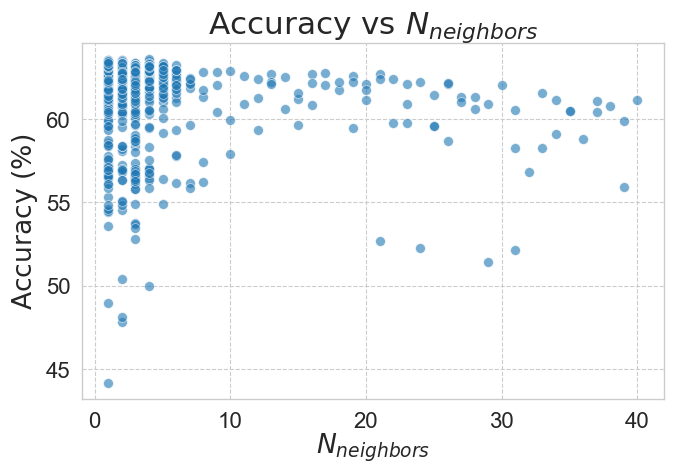

In [7]:
# Load data and extract names
df = DatasetRun.load_from_csv(study_name=study_name, path='../results/final/')

name = "FeNeC_ResNet_CIFAR"
param_name = "n_neighbors"

accuracies = df['value'].values
param_vals = df[f'params_{param_name}'].values
path_to_pdf = f"plots/{name}_acc_vs_{param_name}.pdf"
title = DatasetRun.format_param_accuracy_title(param_name)

DatasetRun.plot_param_accuracy(param_name=param_name, param_vals=param_vals, accuracies=accuracies, ylim=True, 
                               ylim_set=44, xlim_set=None, only_later=0.5, fig_size=(7, 5), font_scale=1.6,
                               title_pad=7, label_pad=0, title=title, path_to_pdf=path_to_pdf)